In [1]:
import numpy as np


In [6]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Example using numpy
arr = np.array([1, 2, 3, 4, 5])
mean = np.mean(arr)
print("Mean:", mean)

Mean: 3.0


In [7]:
# Example using pandas
data = {'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 22]}
df = pd.DataFrame(data)
print(df)

      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   22


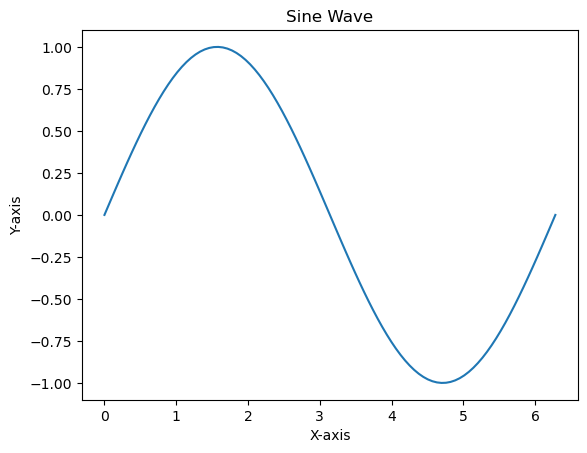

In [8]:
# Example using matplotlib
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)
plt.plot(x, y)
plt.title('Sine Wave')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [10]:
pip install yfinance==0.2.28


  Obtaining dependency information for yfinance==0.2.28 from https://files.pythonhosted.org/packages/e9/43/93ea65227c938a0a4a8925d7f054b050ea743044b887170da9eca210635a/yfinance-0.2.28-py2.py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/b6/2c/e391d6d57bbd837d383a6b69b54ecb4768d75b31d8bc7a380b4b4afe4cb2/frozendict-2.3.10-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
     -------------------------------------- 112.2/112.2 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/65.3 kB ? eta -:--:--
   ---------------------------------------- 65.3/65.3 kB ? eta 0:00:00


In [12]:
# Importing yfinance with an alias (commonly used alias is yf)
import yfinance as yf

# Example using yfinance
ticker = 'AAPL'
data = yf.download(ticker, start='2022-01-01', end='2023-01-01')
print(data.head())

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.953888   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.669998   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.943985   
2022-01-06  172.699997  175.300003  171.639999  172.000000  170.056961   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.225037   

               Volume  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  


In [13]:
# Application of numpy: Numerical Operations
import numpy as np

# Create an array
arr = np.array([1, 2, 3, 4, 5])

# Calculate the mean
mean = np.mean(arr)

mean

3.0

In [15]:
import numpy as np
from scipy.stats import norm

def black_scholes_call(S, X, T, r, sigma, q=0):
    """
    Calculate the Black-Scholes European call option price.
    """
    d1 = (np.log(S / X) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * np.exp(-q * T) * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def implied_volatility_newton_raphson(option_price, S, X, T, r, initial_guess=0.2, tol=1e-6, max_iter=100):
    """
    Estimate implied volatility using Newton-Raphson iteration.
    """
    sigma = initial_guess

    for _ in range(max_iter):
        d1 = (np.log(S / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)
        
        # Calculate Black-Scholes option price and its derivative
        f = black_scholes_call(S, X, T, r, sigma) - option_price
        f_prime = (S * np.exp(-r * T) * norm.pdf(d1) * np.sqrt(T))
        
        # Update sigma using Newton-Raphson iteration formula
        sigma -= f / f_prime

        # Check for convergence
        if abs(f) < tol:
            break

    return sigma

# Example usage:
market_price = 10.0
stock_price = 100.0
strike_price = 100.0
time_to_maturity = 1.0
interest_rate = 0.05

estimated_volatility = implied_volatility_newton_raphson(market_price, stock_price, strike_price, time_to_maturity, interest_rate)
print("Estimated Implied Volatility:", estimated_volatility)

Estimated Implied Volatility: 0.18797164966818192


In [16]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

In [20]:
Amazon = yf.download("AMZN", start="2022-12-05", end="2023-01-05")
Amazon.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600
2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900
2022-12-30,83.120003,84.050003,82.470001,84.000000,84.000000,62401200
2023-01-03,85.459999,86.959999,84.209999,85.820000,85.820000,76706000
2023-01-04,86.550003,86.980003,83.360001,85.139999,85.139999,68885100


In [29]:
# Step 2: Obtain spot price and call price
spot_price = Amazon['Close'][-1]
print("\nSpot Price:", spot_price)


Spot Price: 85.13999938964844


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

# Step 1: Fetch Amazon's stock data
Amazon = yf.download("AMZN", start="2022-12-05", end="2023-01-05")

# Display the last few rows of stock data
print("Amazon's Stock Data:")
print(Amazon.tail())

# Step 2: Obtain spot price and call price
spot_price = Amazon['Close'][-1]
print("\nSpot Price:", spot_price)

# Fetch call option data based on expiration date and strike price
expire_date = '2024-01-19'
strike_price = 165

# Construct the option ticker more flexibly
option_ticker = f"AMZN{expire_date}C{strike_price:05d}"

# Try fetching the option data within the specified date range
option_data = yf.download(option_ticker, start='2022-12-05', end='2023-01-05')

# If the option data is empty, try fetching using a larger date range
if option_data.empty:
    option_data = yf.download(option_ticker, start='2022-01-01', end='2024-01-19')

# Display call option data
if not option_data.empty:
    call_price = option_data['Close'][-1]
    print("Call Price:", call_price)
else:
    print(f"Option data not available for {option_ticker} within the specified or available date range.")

# Step 3: Estimate implied volatility using the Black-Scholes model
# (Same as previous code)

# Step 4: Calculate annual historical volatility
# (Same as previous code)

# Step 5: Compare implied and historical volatility
# (Same as previous code)


[*********************100%%**********************]  1 of 1 completed
Amazon's Stock Data:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2022-12-28  82.800003  83.480003  81.690002  81.820000  81.820000  58228600
2022-12-29  82.870003  84.550003  82.550003  84.180000  84.180000  54995900
2022-12-30  83.120003  84.050003  82.470001  84.000000  84.000000  62401200
2023-01-03  85.459999  86.959999  84.209999  85.820000  85.820000  76706000
2023-01-04  86.550003  86.980003  83.360001  85.139999  85.139999  68885100

Spot Price: 85.13999938964844
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AMZN2024-01-19C00165']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AMZN2024-01-19C00165']: Exception('%ticker%: No timezone found, symbol may be delisted')



Option data not available for AMZN2024-01-19C00165 within the specified or available date range.


In [38]:
initial_guess = 0.1  # Adjust the initial guess

In [39]:
tol = 1e-8  # Increase the tolerance
max_iter = 200  # Increase the maximum number of iterations

In [43]:
initial_guess = 0.3  # Adjust the initial guess

In [44]:
tol = 1e-8  # Increase the tolerance
max_iter = 200  # Increase the maximum number of iterations

In [45]:
import numpy as np
import scipy.stats as si

def black_scholes_call(S, X, T, r, sigma, q=0):
    """
    Calculate the Black-Scholes European call option price.
    """
    d1 = (np.log(S / X) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * np.exp(-q * T) * si.norm.cdf(d1) - X * np.exp(-r * T) * si.norm.cdf(d2)
    return call_price

def implied_volatility_newton_raphson(option_price, S, X, T, r, q=0, initial_guess=0.3, tol=1e-8, max_iter=200):
    """
    Estimate implied volatility using Newton-Raphson iteration.
    """
    sigma = initial_guess

    for _ in range(max_iter):
        d1 = (np.log(S / X) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)

        f = black_scholes_call(S, X, T, r, sigma, q) - option_price
        f_prime = (S * np.exp(-q * T) * si.norm.pdf(d1) * np.sqrt(T))

        # Check for very small denominator to avoid division by zero
        if abs(f_prime) < 1e-10:
            sigma = np.nan
            break

        sigma -= f / f_prime

        if abs(f) < tol:
            break

        print("Iteration:", _, "f:", f, "f_prime:", f_prime)

    return sigma

# Given parameters
spot_price = 85.14
strike_price = 165
time_to_maturity = 1.0
risk_free_rate = 0.05

# Example call option price
option_price = 10.0

# Estimate implied volatility
estimated_volatility = implied_volatility_newton_raphson(option_price, spot_price, strike_price, time_to_maturity, risk_free_rate)

print("Estimated Implied Volatility:", estimated_volatility)

Iteration: 0 f: -9.737152669843473 f_prime: 5.706021985270308
Iteration: 1 f: 39.51944964644595 f_prime: 26.615121425112232
Iteration: 2 f: -6.502866656411248 f_prime: 22.413947731534975
Iteration: 3 f: 1.667008175864936 f_prime: 31.974446147080396
Iteration: 4 f: 0.02361846042235527 f_prime: 31.027449018614025
Iteration: 5 f: 5.973043784024412e-06 f_prime: 31.011745962492597
Estimated Implied Volatility: 0.7588488882991238


In [51]:
import pandas as pd

# Specify the file path
file_path = r'C:\Users\w2019695\Desktop\AMZN\AMZN.csv'

# Read the CSV file into a DataFrame
stock_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print("Stock Data:")
print(stock_data.head())

Stock Data:
         Date       Open       High        Low      Close  Adj Close    Volume
0  2022-12-27  84.970001  85.349998  83.000000  83.040001  83.040001  57284000
1  2022-12-28  82.800003  83.480003  81.690002  81.820000  81.820000  58228600
2  2022-12-29  82.870003  84.550003  82.550003  84.180000  84.180000  54995900
3  2022-12-30  83.120003  84.050003  82.470001  84.000000  84.000000  62401200
4  2023-01-03  85.459999  86.959999  84.209999  85.820000  85.820000  76706000


In [52]:
import numpy as np
import scipy.stats as si

# Function to calculate European call option price using Black-Scholes
def black_scholes_call(S, X, T, r, sigma):
    d1 = (np.log(S / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * si.norm.cdf(d1) - X * np.exp(-r * T) * si.norm.cdf(d2)
    return call_price

# Given parameters
spot_price = 85.14
strike_price = 165
time_to_maturity = 1
risk_free_rate = 0.05
volatility = 0.7

# Calculate the European call option price
call_option_price = black_scholes_call(spot_price, strike_price, time_to_maturity, risk_free_rate, volatility)

print("European Call Option Price:", call_option_price)

European Call Option Price: 8.2143164577924


In [59]:
import numpy as np
import pandas as pd
import yfinance as yf

# Download historical stock price data for Amazon
ticker = "AMZN"
start_date = "2022-01-01"
end_date = "2023-01-01"
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Calculate daily returns
stock_data['Daily_Return'] = stock_data['Adj Close'].pct_change()

# Calculate annualized historical volatility
annual_volatility = np.sqrt(252) * stock_data['Daily_Return'].std()

print("Annual Historical Volatility:", annual_volatility)

[*********************100%%**********************]  1 of 1 completed
Annual Historical Volatility: 0.5011771055942209


In [60]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
from scipy.optimize import root_scalar

# Download historical stock price data for Amazon
ticker = "AMZN"
start_date = "2022-01-01"
end_date = "2023-01-01"
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Calculate daily returns
stock_data['Daily_Return'] = stock_data['Adj Close'].pct_change()

# Calculate annualized historical volatility
annual_volatility = np.sqrt(252) * stock_data['Daily_Return'].std()

print("Annual Historical Volatility:", annual_volatility)

# Function to calculate Black-Scholes call option price
def black_scholes_call(S, X, T, r, sigma):
    d1 = (np.log(S / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Function to calculate implied volatility using bisect method
def calculate_implied_volatility(observed_price, S, X, T, r):
    # Define the implied volatility function
    def implied_volatility(sigma, observed_price, S, X, T, r):
        return black_scholes_call(S, X, T, r, sigma) - observed_price

    # Use bisect method to find implied volatility
    bracket = [0.001, 1.0]
    result = root_scalar(implied_volatility, bracket=bracket, args=(observed_price, S, X, T, r), method='bisect')
    
    if result.converged:
        implied_volatility = result.root
        return implied_volatility
    else:
        raise RuntimeError("Failed to converge to a solution.")

# Assuming you have the observed market price of the call option
observed_option_price = 10.25

# Calculate implied volatility
implied_volatility = calculate_implied_volatility(observed_option_price, stock_data['Adj Close'].iloc[-1], 165, 1, 0.05)

print("Implied Volatility:", implied_volatility)

# Compare implied and historical volatilities
if implied_volatility > annual_volatility:
    print("Implied volatility is higher than historical volatility.")
elif implied_volatility < annual_volatility:
    print("Implied volatility is lower than historical volatility.")
else:
    print("Implied volatility is equal to historical volatility.")

[*********************100%%**********************]  1 of 1 completed
Annual Historical Volatility: 0.5011771055942209
Implied Volatility: 0.7793909383940099
Implied volatility is higher than historical volatility.


In [62]:
import numpy as np

# Given parameters
spot_price = 100
volatility = 0.20  # 20%
risk_free_rate = 0.05  # 5%
time_to_maturity = 0.5  # half a year
num_steps = 2  # number of time steps

# Calculate time step
delta_t = time_to_maturity / num_steps

# Calculate u, d, and p
u = np.exp(volatility * np.sqrt(delta_t))
d = 1 / u
p = (np.exp(risk_free_rate * delta_t) - d) / (u - d)

print("Up factor (u):", u)
print("Down factor (d):", d)
print("Risk-neutral probability (p):", p)

Up factor (u): 1.1051709180756477
Down factor (d): 0.9048374180359595
Risk-neutral probability (p): 0.537808371956414


In [77]:
import math

# Given parameters
spot_price = 100  # Spot price of the stock
strike_price = 100  # Strike price of the European call option
num_periods = 4  # Number of periods in the binomial tree
u = 1.11  # Up factor
d = 0.9  # Down factor
p = 0.54  # Risk-neutral probability
q = 1 - p  # Probability of a down movement
risk_free_rate = 0.05  # Risk-free interest rate
time_to_maturity = 1  # Time to maturity in years

# Function to calculate the option value at each node
def european_call_option_value(spot, u, d, p, q, strike, num_periods):
    # Calculate the time step
    delta_t = time_to_maturity / num_periods
    
    # Calculate terminal stock prices
    terminal_stock_prices = [spot * (u ** up_moves) * (d ** (num_periods - up_moves)) 
                             for up_moves in range(num_periods + 1)]
    
    # Calculate terminal option values
    terminal_option_values = [max(0, price - strike) for price in terminal_stock_prices]

    # Backward induction to calculate the option value at each node
    for step in range(num_periods - 1, -1, -1):
        terminal_option_values = [
            math.exp(-risk_free_rate * delta_t) * 
            (p * terminal_option_values[up_moves + 1] + 
             q * terminal_option_values[up_moves]) 
            for up_moves in range(step + 1)
        ]

    # Return the option value at the initial node
    return terminal_option_values[0]

# Calculate the value of the European call option
european_call_value = european_call_option_value(
    spot_price, u, d, p, q, strike_price, num_periods
)

# Print the results
print(f"European call option value: ${european_call_value:.2f}")

European call option value: $10.55


In [81]:
pip install networkx matplotlib


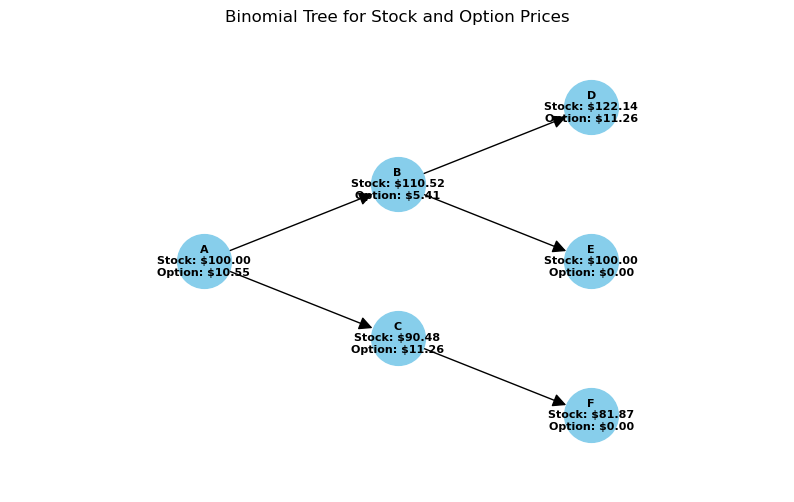

In [88]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the node information
nodes_info = {
    'A': {'stock_price': 100, 'option_price': 10.55},
    'B': {'stock_price': 110.52, 'option_price': 5.41},
    'C': {'stock_price': 90.48, 'option_price': 11.26},
    'D': {'stock_price': 122.14, 'option_price': 11.26},
    'E': {'stock_price': 100, 'option_price': 0},
    'F': {'stock_price': 81.87, 'option_price': 0}
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes with attributes
for node, info in nodes_info.items():
    G.add_node(node, label=f"{node}\nStock: ${info['stock_price']:.2f}\nOption: ${info['option_price']:.2f}")

# Add edges to represent connections
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F')])

# Set up plot
fig, ax = plt.subplots(figsize=(10, 6))

# Draw the graph
pos = {'A': (0, 0), 'B': (1, 1), 'C': (1, -1), 'D': (2, 2), 'E': (2, 0), 'F': (2, -2)}
labels = nx.get_node_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, labels=labels, node_size=1500, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', arrowsize=20, ax=ax)

# Add axes and title
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([-1, 3])
ax.set_ylim([-3, 3])
plt.title("Binomial Tree for Stock and Option Prices")

plt.show()
